In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('2023-02-08_Katarina_pulsed_05-1s_formation_C2D2_Cell123_Channel_53_Wb_1.csv')

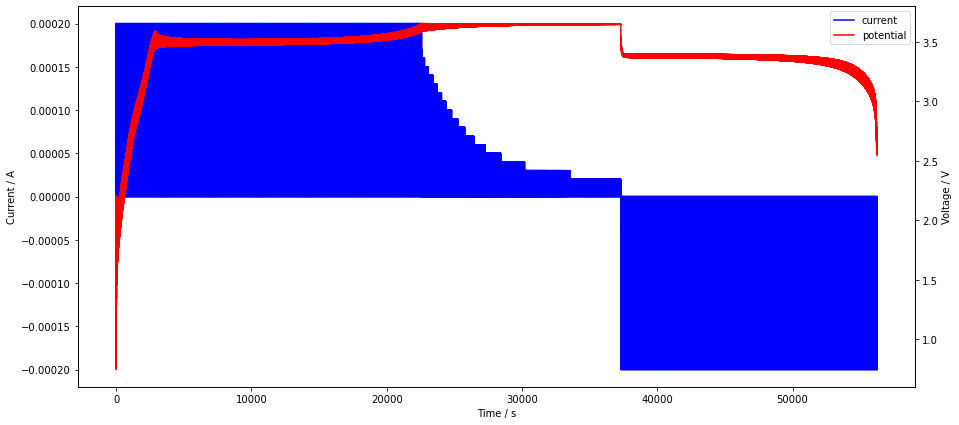

In [3]:
plt.rcParams['figure.figsize'] = [15, 7]

fig, ax1 = plt.subplots()

ax1.plot(data['Test_Time(s)'], data['Current(A)'], '-b', label='current')
ax1.set_xlabel('Time / s')
ax1.set_ylabel('Current / A')

ax2 = ax1.twinx()
ax2.plot(data['Test_Time(s)'], data['Voltage(V)'], '-r', label='potential')
ax2.set_ylabel('Voltage / V')

handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)

plt.show()

In [4]:
# Charge voltage drop

step = list(data['Step_Index'])
current = list(data['Current(A)'])
voltage = list(data['Voltage(V)'])

CC_charge_current_on = []
CC_charge_current_off = []
CC_charge_potential_on = []
CC_charge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==1 or step[i]==2:
        if current[i]!=current[i-1] and step[i]==1 and i>0:
            CC_charge_current_off.append(tempcurr)
            CC_charge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==2 and i>0:
            CC_charge_current_on.append(tempcurr)
            CC_charge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_charge_current_on))
print(len(CC_charge_current_off))
print(len(CC_charge_potential_on))
print(len(CC_charge_potential_off))
print('\n')
print(CC_charge_current_on[0:2])
print(CC_charge_current_off[0:2])
print('\n')
print(CC_charge_potential_on[0:2])
print(CC_charge_potential_off[0:2])

5526
5526
5526
5526


[[0.0002, 0.0002, 0.0002, 0.0002, 0.0002], [0.0002, 0.0002, 0.0002, 0.0002, 0.0002]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


[[1.3271, 1.5715, 1.711, 1.8087, 1.8087], [1.7694, 1.9072, 1.97, 2.0135, 2.0135]]
[[1.1205, 1.0015, 0.93631, 0.89323, 0.86039, 0.83455, 0.81395, 0.7962, 0.78104, 0.76805, 0.75638, 0.74597, 0.74597], [1.3634, 1.2362, 1.1674, 1.1222, 1.0875, 1.0605, 1.0377, 1.0182, 1.0017, 0.98683, 0.97323, 0.96127, 0.96101]]


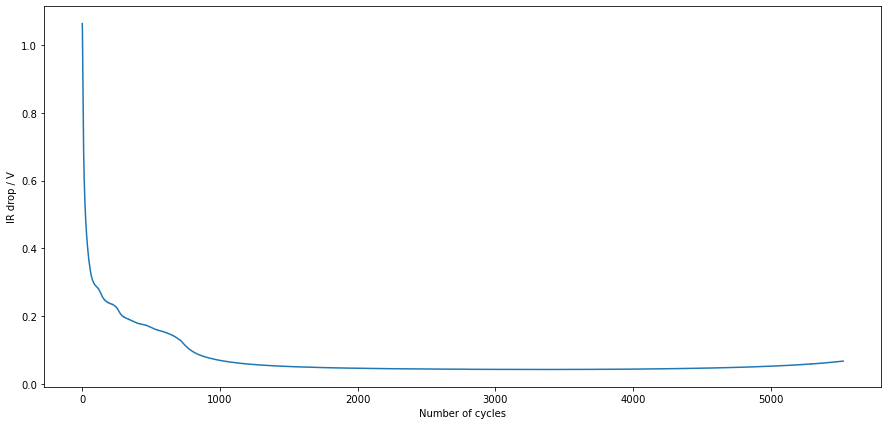

In [5]:
# pseudo IR drop

IRdrop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][-1]
    IRdrop.append(x)

plt.plot(IRdrop)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [6]:
# Charging pseudo IR drop

print(f'Number of cycles: {len(IRdrop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IRdrop[0]}')
print(f'IR drop at 2% state of charge: {IRdrop[round(len(IRdrop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IRdrop[round(len(IRdrop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IRdrop[round(len(IRdrop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IRdrop[round(len(IRdrop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IRdrop[round(len(IRdrop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IRdrop[round(len(IRdrop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IRdrop[round(len(IRdrop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IRdrop[round(len(IRdrop)*0.95)]}')

Number of cycles: 5526


IR drop at 0% state of charge: 1.06273
IR drop at 2% state of charge: 0.28370000000000006
IR drop at 5% state of charge: 0.20779999999999976
IR drop at 10% state of charge: 0.15870000000000006
IR drop at 20% state of charge: 0.06320000000000014
IR drop at 50% state of charge: 0.04369999999999985
IR drop at 70% state of charge: 0.04359999999999964
IR drop at 90% state of charge: 0.052200000000000024
IR drop at 95% state of charge: 0.05810000000000004


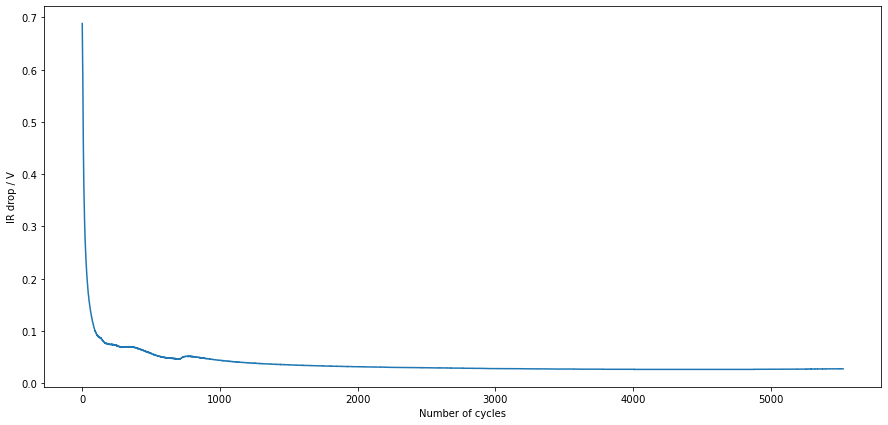

In [13]:
# IR drop

IR_drop=[]

for i in range(len(CC_charge_current_on)):
    x = CC_charge_potential_on[i][-1] - CC_charge_potential_off[i][0]
    IR_drop.append(x)

plt.plot(IR_drop)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [14]:
# Charging IR drop

print(f'Number of cycles: {len(IR_drop)}')
print('\n')
print(f'IR drop at 0% state of charge: {IR_drop[0]}')
print(f'IR drop at 2% state of charge: {IR_drop[round(len(IR_drop)*0.02)]}')
print(f'IR drop at 5% state of charge: {IR_drop[round(len(IR_drop)*0.05)]}')
print(f'IR drop at 10% state of charge: {IR_drop[round(len(IR_drop)*0.1)]}')
print(f'IR drop at 20% state of charge: {IR_drop[round(len(IR_drop)*0.2)]}')
print(f'IR drop at 50% state of charge: {IR_drop[round(len(IR_drop)*0.5)]}')
print(f'IR drop at 70% state of charge: {IR_drop[round(len(IR_drop)*0.7)]}')
print(f'IR drop at 90% state of charge: {IR_drop[round(len(IR_drop)*0.9)]}')
print(f'IR drop at 95% state of charge: {IR_drop[round(len(IR_drop)*0.95)]}')

Number of cycles: 5526


IR drop at 0% state of charge: 0.6881999999999999
IR drop at 2% state of charge: 0.09030000000000005
IR drop at 5% state of charge: 0.06909999999999972
IR drop at 10% state of charge: 0.05229999999999979
IR drop at 20% state of charge: 0.04090000000000016
IR drop at 50% state of charge: 0.028699999999999726
IR drop at 70% state of charge: 0.026599999999999735
IR drop at 90% state of charge: 0.02660000000000018
IR drop at 95% state of charge: 0.026899999999999924


In [7]:
# Discharge voltage drop

CC_discharge_current_on = []
CC_discharge_current_off = []
CC_discharge_potential_on = []
CC_discharge_potential_off = []
tempcurr = []
tempvolt = []

for i in range(len(current)):
    if step[i]==7 or step[i]==8:
        if current[i]!=current[i-1] and step[i]==7 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_off.append(tempcurr)
            CC_discharge_potential_off.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        elif current[i]!=current[i-1] and step[i]==8 and i>0 and len(tempcurr)>1 and len(tempvolt)>1:
            CC_discharge_current_on.append(tempcurr)
            CC_discharge_potential_on.append(tempvolt)
            tempcurr=[]
            tempvolt=[]
        tempcurr.append(current[i])
        tempvolt.append(voltage[i])

print(len(CC_discharge_current_on))
print(len(CC_discharge_current_off))
print(len(CC_discharge_potential_on))
print(len(CC_discharge_potential_off))
print('\n')
print(CC_discharge_current_on[0:2])
print(CC_discharge_current_off[0:2])
print('\n')
print(CC_discharge_potential_on[0:2])
print(CC_discharge_potential_off[0:2])

4638
4638
4638
4638


[[-0.0002, -0.0002, -0.0002, -0.0002, -0.0002], [-0.0002, -0.0002, -0.0002, -0.0002]]
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


[[3.6074, 3.5876, 3.5712, 3.5574, 3.5574], [3.5608, 3.5453, 3.5329, 3.5227]]
[[3.5794, 3.5839, 3.5867, 3.5888, 3.5903, 3.5916, 3.5926, 3.5936, 3.5944, 3.5952, 3.5958, 3.5963, 3.5963], [3.5477, 3.5523, 3.5553, 3.5574, 3.5592, 3.5606, 3.5619, 3.5629, 3.5639, 3.5648, 3.5656, 3.5663, 3.5663]]


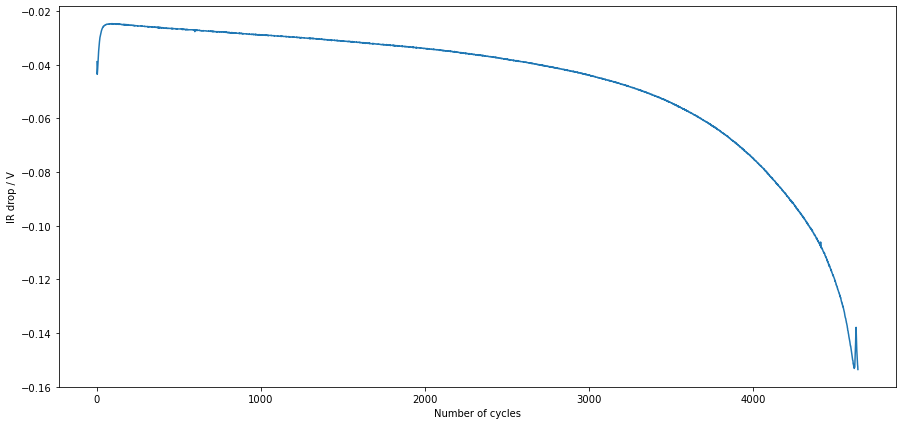

In [8]:
# discharge pseudo IR drop

IRdrop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][-1]
    IRdrop_dis.append(x)

plt.plot(IRdrop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('pseudo IR drop / V')
plt.show()

In [9]:
# discharge pseudo IR drop

print(f'Number of cycles: {len(IRdrop_dis)}')
print('\n')
print(f'IR drop at 5% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.05)]}')
print(f'IR drop at 10% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.1)]}')
print(f'IR drop at 20% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.2)]}')
print(f'IR drop at 50% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.5)]}')
print(f'IR drop at 70% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.7)]}')
print(f'IR drop at 90% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.9)]}')
print(f'IR drop at 95% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.95)]}')
print(f'IR drop at 98% state of charge: {IRdrop_dis[round(len(IRdrop_dis)*0.98)]}')

Number of cycles: 4638


IR drop at 5% state of charge: -0.02540000000000031
IR drop at 10% state of charge: -0.026499999999999968
IR drop at 20% state of charge: -0.02859999999999996
IR drop at 50% state of charge: -0.03639999999999999
IR drop at 70% state of charge: -0.04820000000000002
IR drop at 90% state of charge: -0.08650000000000002
IR drop at 95% state of charge: -0.10719999999999974
IR drop at 98% state of charge: -0.13019999999999987


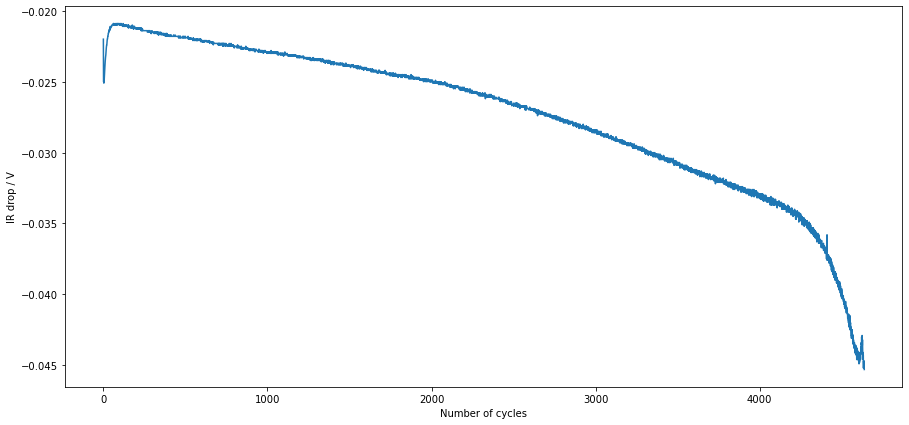

In [15]:
# discharge IR drop

IR_drop_dis=[]

for i in range(len(CC_discharge_current_on)):
    x = CC_discharge_potential_on[i][-1] - CC_discharge_potential_off[i][0]
    IR_drop_dis.append(x)

plt.plot(IR_drop_dis)
plt.xlabel('Number of cycles')
plt.ylabel('IR drop / V')
plt.show()

In [16]:
# discharge IR drop

print(f'Number of cycles: {len(IR_drop_dis)}')
print('\n')
print(f'IR drop at 5% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.05)]}')
print(f'IR drop at 10% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.1)]}')
print(f'IR drop at 20% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.2)]}')
print(f'IR drop at 50% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.5)]}')
print(f'IR drop at 70% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.7)]}')
print(f'IR drop at 90% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.9)]}')
print(f'IR drop at 95% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.95)]}')
print(f'IR drop at 98% state of charge: {IR_drop_dis[round(len(IR_drop_dis)*0.98)]}')

Number of cycles: 4638


IR drop at 5% state of charge: -0.02120000000000033
IR drop at 10% state of charge: -0.02190000000000003
IR drop at 20% state of charge: -0.022800000000000153
IR drop at 50% state of charge: -0.0259999999999998
IR drop at 70% state of charge: -0.029699999999999616
IR drop at 90% state of charge: -0.03379999999999983
IR drop at 95% state of charge: -0.0371999999999999
IR drop at 98% state of charge: -0.042300000000000004


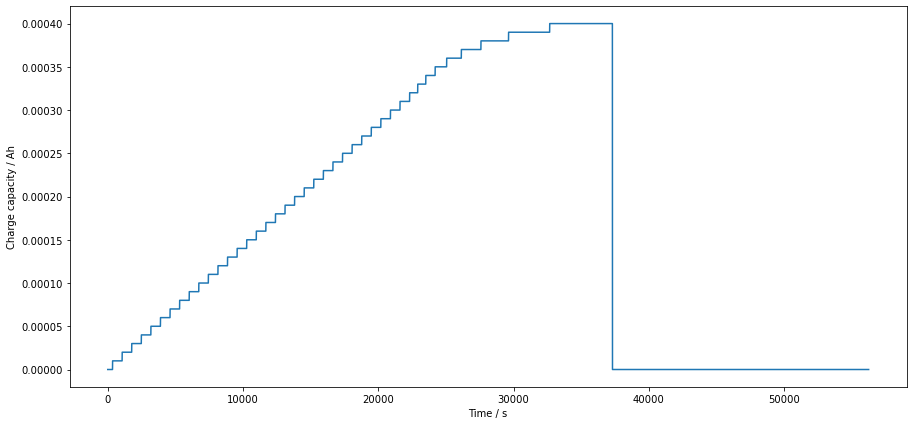

In [10]:
plt.plot(data['Test_Time(s)'], data['Charge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Charge capacity / Ah')

plt.show()

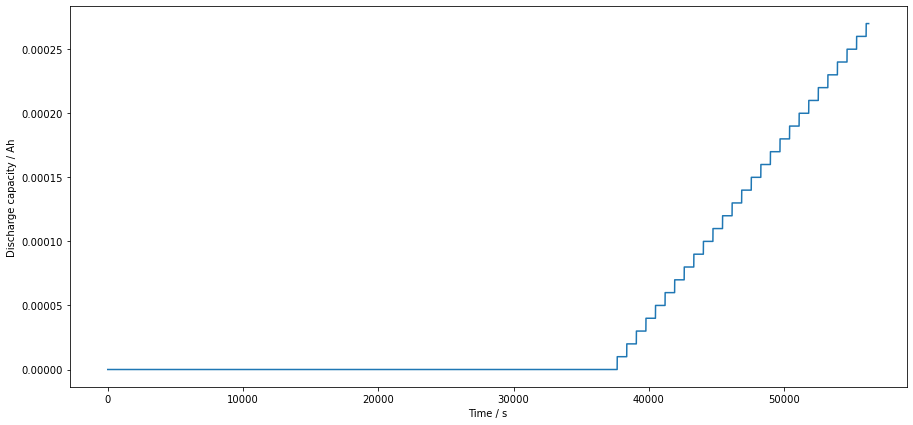

In [11]:
plt.plot(data['Test_Time(s)'], data['Discharge_Capacity(Ah)'])
plt.xlabel('Time / s')
plt.ylabel('Discharge capacity / Ah')

plt.show()

In [12]:
step = data['Step_Index']
time = data['Test_Time(s)']
current = data['Current(A)']

charge_time = []
charge_current = []
discharge_time = []
discharge_current = []
for i in range(len(current)):
    if step[i]==1 or step[i]==2 or step[i]==3 or step[i]==4:
        charge_time.append(time[i])
        charge_current.append(current[i])
    elif step[i]==7 or step[i]==8:
        discharge_time.append(time[i])
        discharge_current.append(current[i])

C=np.trapz(x=charge_time, y=charge_current)
C=C*1000/3600
print(f'Charge capacity: {round(C,2)} mAh.')

D=np.trapz(x=discharge_time, y=discharge_current)
D=D*1000/3600
print(f'Discharge capacity: {round(D,2)} mAh.')

Charge capacity: 0.37 mAh.
Discharge capacity: -0.27 mAh.
